# Самостоятельный проект «Рынок компьютерных игр»

# Введение

Я работаю в в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В предстоящем исследовании я собираюсь выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

У нас есть данные за 2016-й год. Представим, что сейчас декабрь 2016-го и спланируем кампанию на 2017-й.

# Шаг 1. Открываем файл с данными и изучаем общую информацию

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter("ignore")
from pymystem3 import Mystem
from collections import Counter
from scipy import stats as st
from datetime import datetime
import seaborn as sns
from random import randint

In [2]:
# считаем csv-файл в переменную df
try:
    df = pd.read_csv('/datasets/games.csv') # если открытие файла происходит на платформе Яндекс.Практикум
except:
    df = pd.read_csv('games.csv') # если мы работаем локально

# ознакомимся с первыми пятью строками таблицы
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# изучим информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Проверим, есть ли грубые дубликаты

df.duplicated().sum()

0

Изучим подробнее данные в столбцах, которые имеют пропуски

In [5]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [6]:
df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [7]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [8]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [9]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В результате выполнения первого шага исследования мы считали csv-файл в переменную df и ознакомились с данными. Напрашивается необходимость привести имена столбцов к нижнему регистру, также нужно обработать пропуски в столбцах, а ещё изменить тип данных в столбцах 'Year_of_Release' и 'User_Score'

# Шаг 2. Подготавливаем данные 

In [10]:
# приводим имена столбцов к нижнему регистру
df.columns = df.columns.str.lower()

# убедимся, что изменения вступили в силу
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
# оценим количество пропусков в столбце 'year_of_release'
df.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков в столбце 'year_of_release' 269 — это чуть больше 1%, поэтому тоже удалим их

In [12]:
# оценим количество пропусков в названиях игр
df.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
df.dropna(subset=['year_of_release', 'name', 'genre'], inplace=True)
df = df.reset_index(drop=True)

In [14]:
# оценим количество пропусков в столбцах 'critic_score', 'rating' и 'user_score'

df[['critic_score', 'rating', 'user_score']].isna().sum()

critic_score    8461
rating          6676
user_score      6605
dtype: int64

Пропуски в оценках и рейтингах занимают значимую часть наших данных. Вероятно, была ошибка при выгрузке данных, либо повлиял человеческий фактор. Удалить такое количество записей мы не сможем, это сильно повлияет на результат исследования, поэтому оставим эти пропуски. Далее приведём значения столбца 'user_score' к числовому типу.

In [15]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.6       2
2.3       2
0.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В данных столбца 'user_score' есть значение tbd, при чём оно составляет где-то 1/7 данных. Это много, чтобы удалять. Заменим значение 'tbd' на nan, чтобы новые значения не повлияли на оценку рейтингов и столбец можно было перевести в тип float

In [16]:
# "достанем" значение nan из библиотеки numpy
df.loc[df['user_score']=="tbd", 'user_score']=np.nan

In [17]:
# приведём значения столбца 'user_score' к числовому типу с помощью метода to_numeric()
df['user_score'] = pd.to_numeric(df['user_score'])

In [18]:
# Убедимся, что изменения вступили в силу
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [19]:
# Объявим столбец 'total_sales' и сохраним в нём значение суммы выручки по регионам

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


В результате второго шага мы удалили строки с пропусками в данных там, где это было возможно, привели данные столбцов к ожидаемым типам, а ещё добавили таблице новый столбец 'total_sales', который хранит информацию о сумме продаж по регионам для каждой игры. Перейдём  к третьему шагу

In [20]:
df['rating'] = df['rating'].fillna('RP')
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'] = df['rating'].replace('EC', 'E')

df['rating'].value_counts()

RP      6677
E       3932
T       2905
M       1536
E10+    1393
AO         1
Name: rating, dtype: int64

# Шаг 3. Исследовательский анализ данных 

Посмотрим, сколько игр выпускалось в разные годы и определим, важны ли данные за все периоды?

In [21]:
# Создадим таблицу, которая будет содержать сведения о количестве выпущенных игр в каждом году

games_by_years = df.groupby('year_of_release')['name'].count().reset_index()
games_by_years.columns = ['year', 'quantity']

# Посмотрим на первые 10 строк новой таблицы
display(games_by_years.head(10))

,year,quantity
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


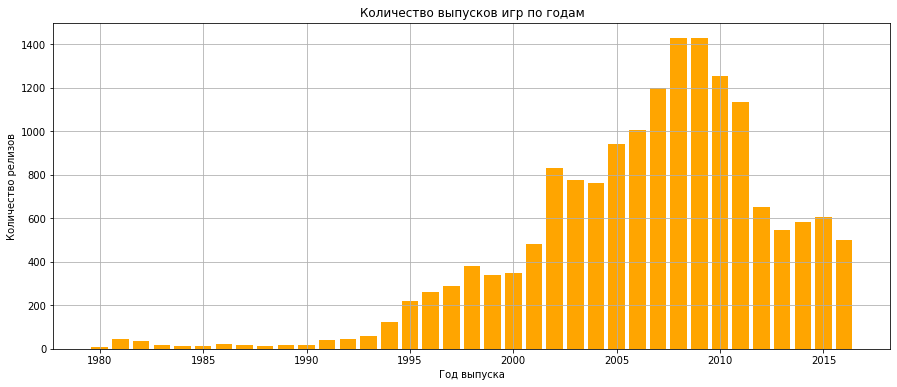

In [22]:
# визуализируем с помощью графика барплот количество игр, выпущенных в разные годы: на оси x разместим годы,
# а на оси y — количество выпущенных игр

plt.figure(figsize=(15, 6))
plt.bar(games_by_years['year'], games_by_years['quantity'], label='Количество выпусков в год', color='orange')
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.grid()
plt.title('Количество выпусков игр по годам')
plt.show()

На этом графике мы видим историю выхода игр. Простейшие игры до середины 90-х. В самом начале технологии ещё не позволяли перейти рынку игр в крупно-промышленное производство. В середине 90-х наблюдается резкий скачок: рынок игр стремительно набирает обороты. В 2002 количество игр снова увеличивается, практически вдвое и продолжает рост вплоть до 2011 года. В 2012 мы видим падение в половину предыдущего года и далее уже никакого роста не наблюдается. Это можно объяснить популярностью мобильных игр, люди стали играть в игры на смартфонах. Нет спроса на компьютерные игры, значит и нет смысла выпускать новые. В этой ситуации правильнее инвестировать в мобильные игры. Скорее всего, производители игр так и поступили. Данные до 1995 года будем считать неактуальными.

Изучим, как менялись продажи игр по платформам и выберем платформы с наибольшими суммарными продажами, затем построим распределение по годам, чтобы ответить на вопрос, за какой характерный срок появляются новые и исчезают старые платформы?

In [23]:
# Создадим таблицу с 10 самыми прибыльными платформами 
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
display(top_platforms)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


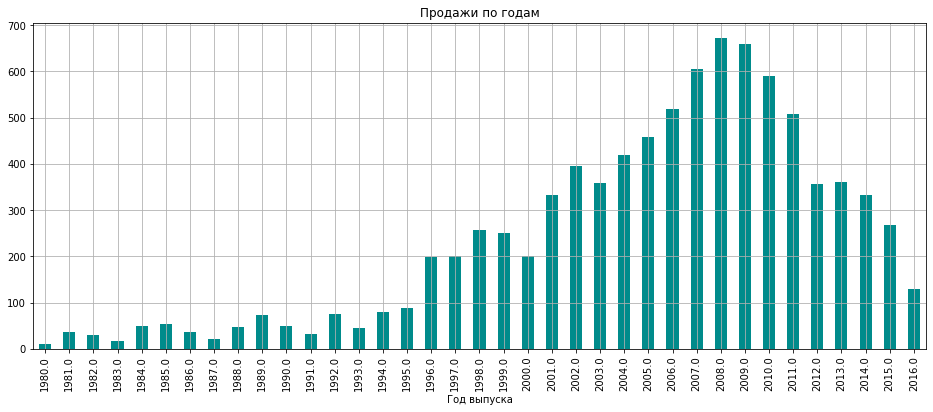

In [24]:
df.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='bar', figsize=(16, 6), color='darkcyan')
plt.title('Продажи по годам')
plt.xlabel('Год выпуска')
plt.grid(True)
plt.show()

In [25]:
# Создадим список с Топ-10 платформами
top_platforms_list = list(top_platforms['platform'])
top_platforms_list 

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [26]:
# Создадим новый датасет, отфильтровав старый по названиям платформ из топ-10
df_top = df.query('platform in @top_platforms_list').reset_index(drop=True)
display(df_top.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
5,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
6,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,RP,24.67
7,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
8,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
9,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


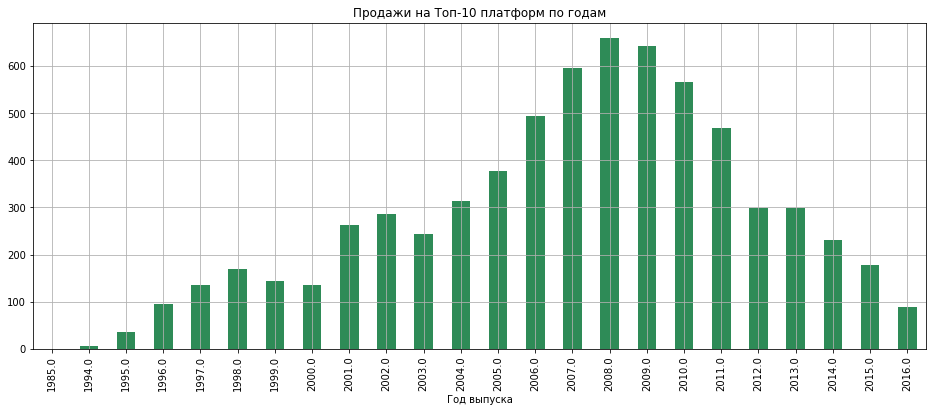

In [27]:
df_top.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='bar', figsize=(16, 6), color='seagreen')
plt.title('Продажи на Топ-10 платформ по годам')
plt.xlabel('Год выпуска')
plt.grid(True)
plt.show()

Топ-10 платформ по продажам почти не включает данные до 1995, что подтверждает неактуальность этого периода.

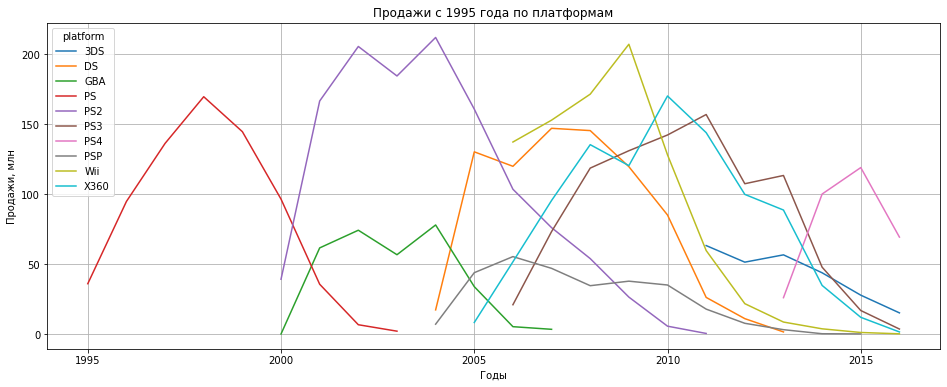

In [28]:
df_top.query('year_of_release >= 1995').pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum').plot(figsize=(16, 6))
plt.grid(True)
plt.title('Продажи с 1995 года по платформам')
plt.xlabel('Годы')
plt.ylabel('Продажи, млн')
plt.show()

Оценим, за какое в среднем время появляются новые и исчезают старые платформы

In [29]:
# Сколько лет "живёт" Топ-10 платформ
df_top_years = df_top.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
df_top_years['platform'].value_counts()

X360    12
PSP     12
PS2     12
PS3     11
DS      11
Wii     11
PS      10
GBA      8
3DS      6
PS4      4
Name: platform, dtype: int64

Среднее значение продолжительности жизни платформы — 11 лет.

Для дальнейшего исследования возьмём данные только за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Как мы выяснили ранее, средний срок жизни платформ прримерно 11 лет, поэтому для прогноза на 2017 год возьмем предыдущий период в 11 лет (с 2006 года)

In [30]:
# сводная таблица pivot_df количества игр для каждой платформы по годам в актуальный период
pivot_df = df.query('year_of_release > 2005').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='.')

# подправим названия колонок
pivot_df.columns=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


display(pivot_df)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,.,.,.,.,.,116.0,93.0,91.0,80.0,86.0,46.0
DC,.,1.0,1.0,.,.,.,.,.,.,.,.
DS,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,.,.,.
GBA,39.0,6.0,.,.,.,.,.,.,.,.,.
GC,40.0,4.0,.,.,.,.,.,.,.,.,.
PC,52.0,62.0,76.0,107.0,90.0,139.0,61.0,38.0,47.0,50.0,54.0
PS2,259.0,214.0,191.0,96.0,38.0,7.0,.,.,.,.,.
PS3,27.0,90.0,138.0,162.0,181.0,215.0,148.0,126.0,108.0,73.0,38.0
PS4,.,.,.,.,.,.,.,16.0,75.0,137.0,164.0


По распределению можно заметить, что примерно в 2006 году рынок платформ меняется и на замену старым приходят новые.
Поэтому можно сократить актуальный период до 3 лет (2014 - 2016).
Мы, конечно же, так потеряем данные по платформам, которые были на всем периоде 11 лет, но рынок игр так стремительно меняется, что взять в расчёт более поздний период, в котором будут пробладать новые платформы.

Теперь перейдём к поиску потенциально прибыльных платформ и выясним, какие платформы лидируют по продажам, растут или падают.

In [31]:
df_actual_years = df[df['year_of_release'] >= 2014]
df_actual_years.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='.')

year_of_release,2014.0,2015.0,2016.0
platform,,,
3DS,80.0,86.0,46.0
PC,47.0,50.0,54.0
PS3,108.0,73.0,38.0
PS4,75.0,137.0,164.0
PSP,10.0,3.0,.
PSV,100.0,110.0,85.0
Wii,6.0,4.0,1.0
WiiU,31.0,28.0,14.0
X360,63.0,35.0,13.0


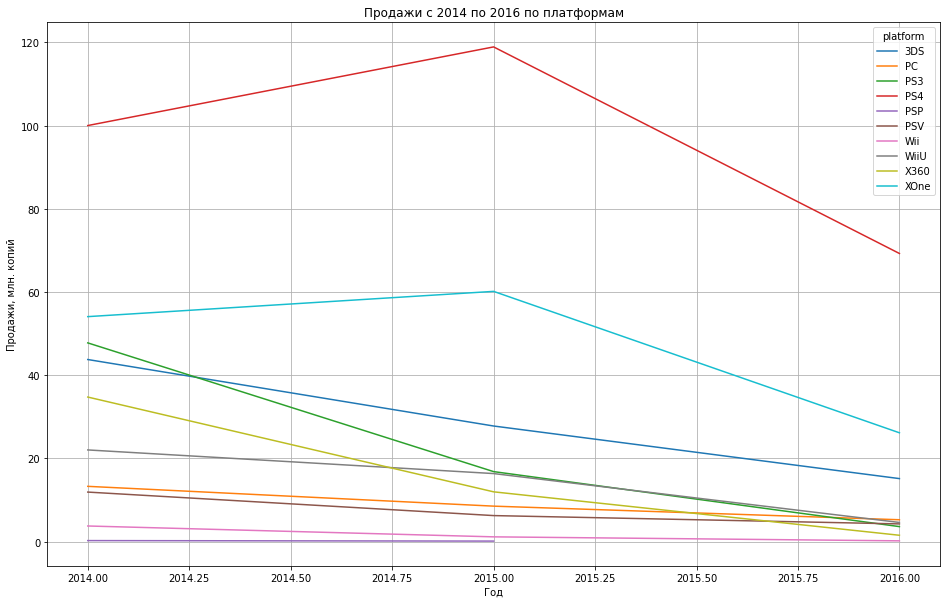

In [32]:
# Построим графики динамики продаж Топ-10 платформ за актуальный период

df_actual_years.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(16, 10))
plt.grid(True)
plt.title('Продажи с 2014 по 2016 по платформам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий')
plt.show()

По графику видно, что все платформы теряют в продажах со временем. По условиям, данные по 2016 году могут быть неполными, а значит ориентироваться на него не стоит. Шанс улучшить показатели продаж есть у PS4, PC, PSV, XOne и WiiU. Наилучшие перспективы у платформ PS4 и XOne.

In [33]:
# Список Топ-5 перспективных платформ
top5_platform_name = ['PS4', '3DS', 'XOne', 'WiiU', 'PSV']

# Продажи Топ-5 перспективных платформ
top5_platform = df_actual_years.query('platform in @top5_platform_name').groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
top5_platform

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,WiiU,42.98
4,PSV,22.40


Построим график боксплот по глобальным продажам игр в разбивке по платформам, изучим и опишем результаты.

(0.0, 1.25)

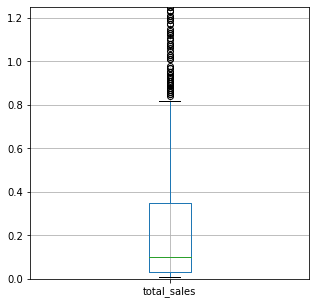

In [34]:
df_actual_years.boxplot('total_sales', figsize=(5,5))
plt.ylim(0,1.25)

In [35]:
df_actual_years['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

In [36]:
df_actual_5 = df_actual_years.query('platform in @top5_platform_name')

Text(0.5, 0, 'Название платформы')

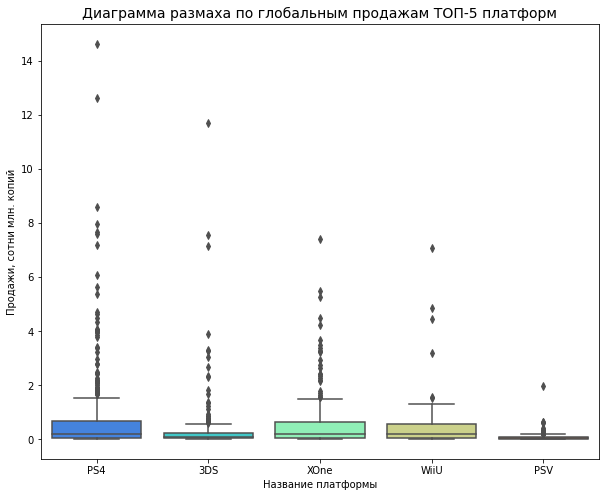

In [37]:
# График боксплот по глобальным продажам за актуальный период по каждой перспективной платформе: 

plt.figure(figsize=(10, 8))
# plt.ylim(0, 2) -- удаляем ограничения :)
sns.boxplot(x="platform", y="total_sales", data = df_actual_5 , palette='rainbow')
plt.title('Диаграмма размаха по глобальным продажам ТОП-5 платформ', fontsize=14)
plt.ylabel('Продажи, сотни млн. копий')
plt.xlabel('Название платформы')

In [38]:
# глобальные продажи по актуальным платформам

df_actual_years_5 = df_actual_5.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value='.')
df_actual_years_5['all_years'] = df_actual_years_5.sum(axis=1)
df_actual_years_5

year_of_release,2014.0,2015.0,2016.0,all_years
platform,,,,
3DS,43.76,27.78,15.14,86.68
PS4,100.00,118.90,69.25,288.15
PSV,11.90,6.25,4.25,22.40
WiiU,22.03,16.35,4.60,42.98
XOne,54.07,60.14,26.15,140.36


За последние 3 года наибольший объем продажа у платформ: PS4, XOne и 3DS. Но продажи платформа 3DS за счёт более ранних продаж, тогда как сейчас наблюдается стабильное падение. Высокие медиальные значения у PS4, XOne и WiiU, хотя WiiU сильно меньше в объемах продаж.
Так как продажи указаны в млн. копий, а не в денежном выражении, то есть вероятность, что платформа WiiU тоже может быть перспективной. 
Ещё можно заметить, что для всех платформ медиана ближе к нижнему квантилю, а верхний очень далек, плюс есть выбросы. Отсюда делаем вывод не только что где то больше, где то меньше продажи, где то большая вариативность игры по продажам, где то меньше, но и то, что в интервале с небольшими продажами находится очень много игр, а есть суперпопулярные игры (выбросы),   продажи которых могут быть выше чем остальные игры вместе взятые. Будем считать это характеристикой игровой отрасли

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
Сформулирем выводы.

Самая продаваемая платформа у нас PS4, посмотрим взаимосвязи на ней.

In [39]:
# отфильтруем данные по платформе PS4 и подготовим таблицу
filtered_PS4 = df_actual_years.query('platform == "PS4"')
filtered_PS4 = filtered_PS4[['critic_score', 'user_score', 'total_sales']]
filtered_PS4.head()

,critic_score,user_score,total_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66


Text(0.5, 1.0, 'Зависимость Продаж от оценки критиков')

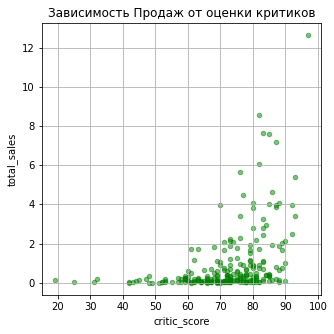

In [40]:
# далее построим диаграммы рассеяния

filtered_PS4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,5), color='g', alpha=0.5, grid=True)
plt.title('Зависимость Продаж от оценки критиков')

Text(0.5, 1.0, 'Зависимость Продаж от оценки пользователей')

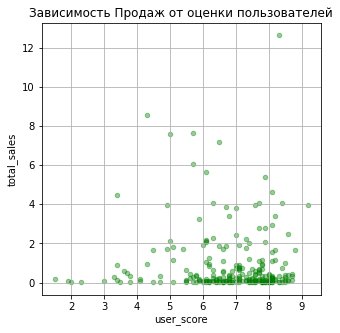

In [41]:

filtered_PS4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,5), color='g', alpha=0.4, grid=True)
plt.title('Зависимость Продаж от оценки пользователей')

По графикам можно сказать, что оценки критиков и пользователей не оказывают слишком сильного влияние на продажи игр.
Посмотрим кореляцию

In [42]:
filtered_PS4.corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.55,0.40
user_score,0.55,1.00,-0.04
total_sales,0.40,-0.04,1.00


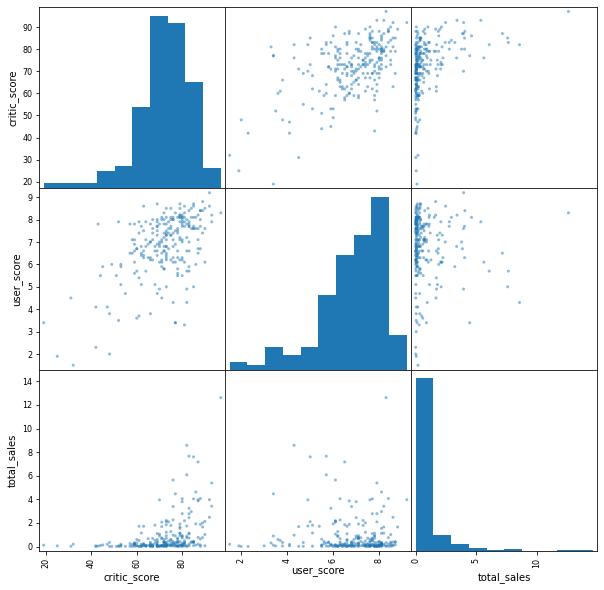

In [43]:
pd.plotting.scatter_matrix(filtered_PS4, figsize=(10,10), alpha=0.5)
plt.ticklabel_format(useOffset=False)

Заметна положительная корреляция между оценкой критиков и пользователей.
Пользователи могут опираться на мнение критиков в своих оценках и наоборот.

Соотнесём выводы с продажами игр на других платформах

In [44]:
df_actual_years.query('platform == "3DS"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.86,0.31
user_score,0.86,1.00,0.22
total_sales,0.31,0.22,1.00


In [45]:
df_actual_years.query('platform == "XOne"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.44,0.43
user_score,0.44,1.00,-0.07
total_sales,0.43,-0.07,1.00


In [46]:
df_actual_years.query('platform == "WiiU"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.76,0.37
user_score,0.76,1.00,0.41
total_sales,0.37,0.41,1.00


In [47]:
df_actual_years.query('platform == "PSV"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.52,0.04
user_score,0.52,1.00,-0.17
total_sales,0.04,-0.17,1.00


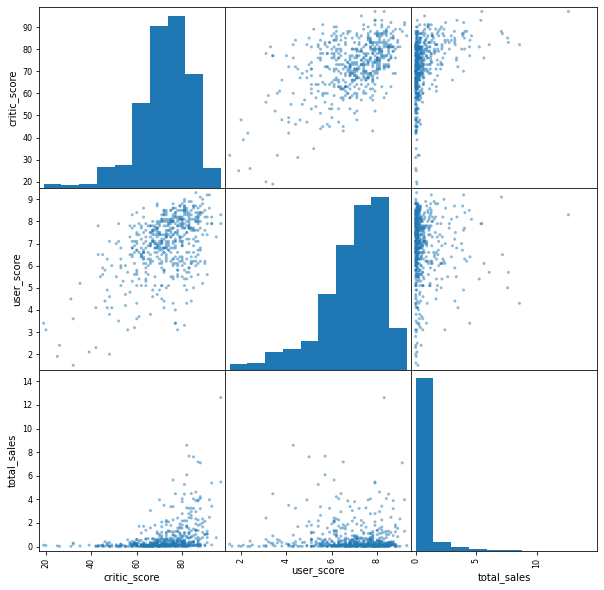

In [48]:
pd.plotting.scatter_matrix(df_actual_5[['critic_score', 'user_score', 'total_sales']], figsize=(10,10), alpha=0.5);


In [49]:
df_actual_5[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.52,0.38
user_score,0.52,1.00,-0.03
total_sales,0.38,-0.03,1.00


Для остальных платформ мы видим более выраженную корреляцию между оценками (> 0.7), а значит существует положительная связь — чем выше оценки критиков, тем выше оценки пользователей и наоборот. Связь между оценками и количеством проданных копий положительная, но очень слабая (не более 0.42), мы не можем брать её в расчёт.

При оценки общей корреляции, можно говорить о невысокой положительной связи (0.53) оценки критиков и оценки пользователей.

Теперь провёдём анализ распределения игр по жанрам. Посмотрим на общее распределение игр по жанрам.
Выясним, что можно сказать о самых прибыльных жанрах.
Посмотрим, выделяются ли жанры с высокими и низкими продажами.

In [50]:
df_actual_5['genre'].value_counts()

Action          456
Role-Playing    169
Adventure       140
Sports           93
Misc             86
Shooter          78
Racing           40
Fighting         36
Platform         32
Simulation       22
Strategy         19
Puzzle           13
Name: genre, dtype: int64

In [51]:
df_actual_5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16428,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16432,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16436,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


In [52]:
# самые прибыльные жанры
df_genre = df_actual_5.groupby(['genre'])\
                        .agg({'total_sales':'sum', 'name':'count'})\
                        .rename(columns={'name':'name_count'})\

df_genre.sort_values(by = 'total_sales', ascending=False)

,total_sales,name_count
genre,,
Action,162.20,456
Shooter,139.32,78
Role-Playing,87.18,169
Sports,77.03,93
Misc,26.38,86
Fighting,24.57,36
Racing,24.24,40
Platform,17.08,32
Adventure,13.05,140


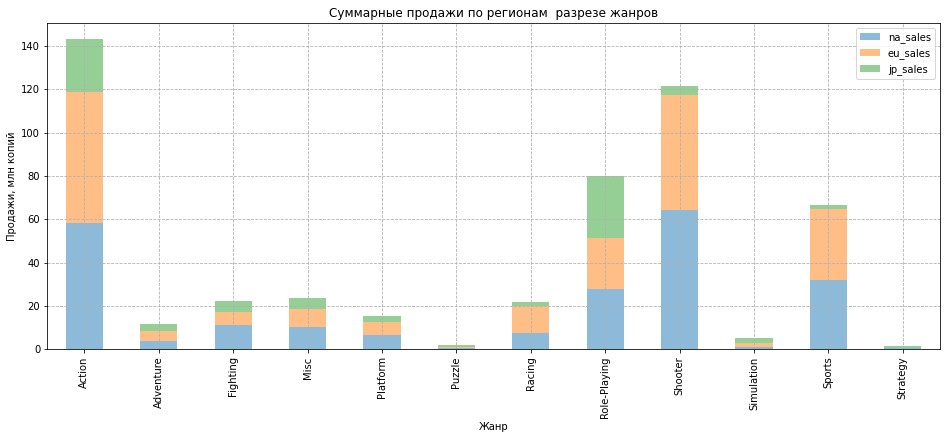

In [53]:
fig, ax = plt.subplots()

(df_actual_5
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(16, 6), alpha=0.5))

ax.set_title('Суммарные продажи по регионам  разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

Самыми продаваемыми жанрами являются:

- Action
- Shooter
- Role-Playing
- Sports
- Platform

Но нельзя сказать, какой из жанров прибыльнее, так как неизвестны затраты на создание игры. В жанре Action самое большое количество игр. Можно предположить, что их создание обходится недорого, а объемы продаж позволяют производителям получать хорошую прибыль. Также большое кличество игр наблюдается в жанре Role-Playing и сопровождается высоким уровнем продаж.
А вот в жанре Shooter игр не так много, хотя жанр на 2 месте по объемам продаж, возможно здесь создание игр выходит разработчикам существенно дороже и прибыль становится не такой ощутимой.

Самые низкие продажи и минимальное количество игр у жанров Puzzle и Strategy.

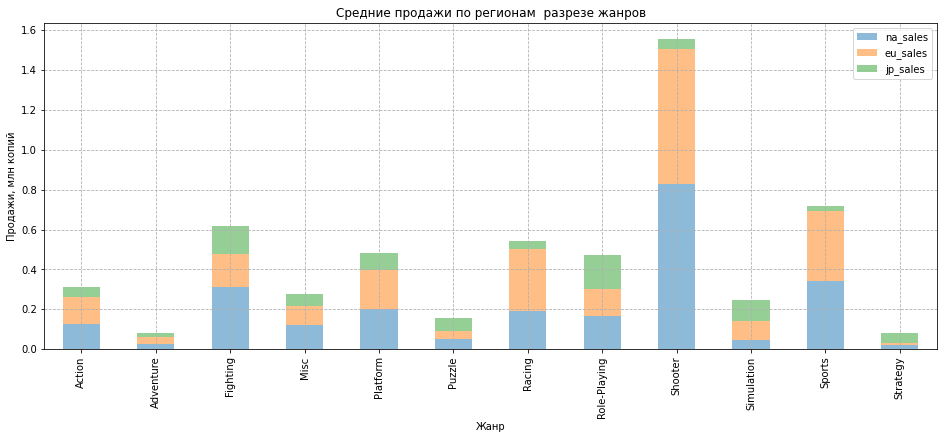

In [54]:
fig, ax = plt.subplots()

(df_actual_5
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
 .agg('mean')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(16, 6), alpha=0.5))

ax.set_title('Средние продажи по регионам  разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

По среднему количеству продаж мы наблюдаем смещение лидеров: теперь на первом месте по продажам - Shooters, а в тройке лидеров появляется жанр Platform. Action выбыл из топ-5.

Такой результат говорит о том, что этих жанрах есть игры-хиты с многомиллионными продажами.

Platform — вид аркад, в которых нужно, управляя героем, ходить, в большинстве случаев, нейтрализуя или избегая врагов, и собирать различные бонусы.

На третьем шаге нашего исследования нам удалось выяснить, что:

- актуальный период, данные которого помогут построить прогноз на 2017 - это 2011 - 2016 годы
- самые перспективные платформы: PS4, XOne и WiiU
- оценки критиков и пользователей не имеют выраженного влияния на объемы продаж, но оценки влияют друг на друга
- в среднем самые продаваемые жанры: Shooter, Sports и Fighting, именно в этих жанрах совершены многомиллионные продажи. 

# Шаг 4. Составляем портрет пользователя каждого региона

In [55]:
df_actual_5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98


In [56]:
df_actual_5[['na_sales', 'eu_sales', 'jp_sales']].describe()

,na_sales,eu_sales,jp_sales
count,1184.000000,1184.000000,1184.000000
mean,0.189527,0.176596,0.068775
std,0.503275,0.527148,0.248536
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.020000,0.020000,0.020000
75%,0.130000,0.120000,0.060000
max,6.030000,6.310000,3.180000


In [57]:
# Наиболее популярные платформы (топ-5). 
df_platform = df_actual_5.groupby(['platform']).agg({'na_sales':'sum'})
                      

df_platform.sort_values(by='na_sales', ascending=False)

,na_sales
platform,
PS4,98.61
XOne,81.27
3DS,22.64
WiiU,19.36
PSV,2.52


In [58]:
columns_and_labels = {
    'na_sales': 'Северной Америки --',
    'jp_sales': 'Японии --',
    'eu_sales': 'Европы --'
}

In [59]:
for column, label in columns_and_labels.items():
    current_platform = df_actual_5.groupby(['platform']).agg({column:'sum'}).reset_index().sort_values(by=column, ascending=False).head(5)
    print()
    print('-- Топ-5 платформ ' + label)
    display(current_platform)
    print()


-- Топ-5 платформ Северной Америки --


,platform,na_sales
1,PS4,98.61
4,XOne,81.27
0,3DS,22.64
3,WiiU,19.36
2,PSV,2.52




-- Топ-5 платформ Японии --


,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,WiiU,7.31
4,XOne,0.32




-- Топ-5 платформ Европы --


,platform,eu_sales
1,PS4,130.04
4,XOne,46.25
0,3DS,16.12
3,WiiU,13.15
2,PSV,3.53


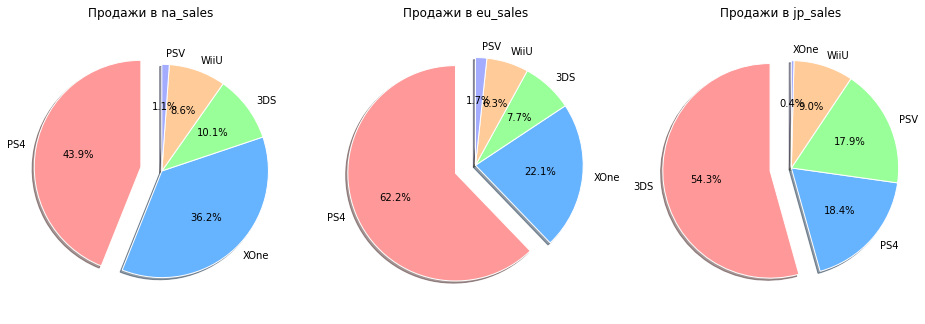

In [60]:
top_5platform_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5platform_dict[region] = df_actual_5.groupby('platform')[region].sum().sort_values(ascending=False).head(5)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

# Задаём переменные 
i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.2, 0, 0, 0, 0)

#Задаём набор цветов
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#a3acff']

# Цикл для вывода диаграмм распределения жанров 
for i in [0,1,2]:
    labels = top_5platform_dict[region[i]].index
    sizes = top_5platform_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors) 
    ax.axis('equal')  
plt.show()

Топ5 платформ в США и Европе очень схож. 1 мето у платформы PS4, причем если в США доля от всех продаж 32,5%, то в Европе практически половина продаж приходится на эту платформу (48.3%). Платформы XOne и 3DS в зависимости от региона занимают 2 и 3 место. 4 и 5 места у платформ WiiU и PSV соответственно с примерно одинаковыми долями для каждого рынка.
Топ5 платформ в Японии заметно отличается. Тут 1 место 2/3 (66,3%) продаж принадлежит платформе 3DS. Платформы PSV, PS4 и WiiU составляют 14.4%, 10.5% и 8.6% соответственно. При выходе на Японский рынок стоит учитывать его особенности.Портативная игровая система 3DS производства Nintendo невероятно популярна за счет своей доступности в регионе создания.

Теперь изучим топ-5 самых популярных жанров

In [61]:
for column, label in columns_and_labels.items():
    current_table = df_actual_5.groupby(['genre']).agg({column:'sum'}).reset_index().sort_values(by=column, ascending=False).head(5)
    print(  )
    print('-- Топ-5 жанров ' + label)
    display(current_table)
    print()
    


-- Топ-5 жанров Северной Америки --


,genre,na_sales
8,Shooter,64.42
0,Action,58.50
10,Sports,31.86
7,Role-Playing,27.98
2,Fighting,11.22




-- Топ-5 жанров Японии --


,genre,jp_sales
7,Role-Playing,28.70
0,Action,24.71
3,Misc,5.17
2,Fighting,5.01
8,Shooter,4.21




-- Топ-5 жанров Европы --


,genre,eu_sales
0,Action,60.17
8,Shooter,52.74
10,Sports,32.70
7,Role-Playing,23.18
6,Racing,12.31


In [62]:
top5genre_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5genre_dict[region] = df_actual_5.groupby('genre')[region].sum().sort_values(ascending=False).head(5)

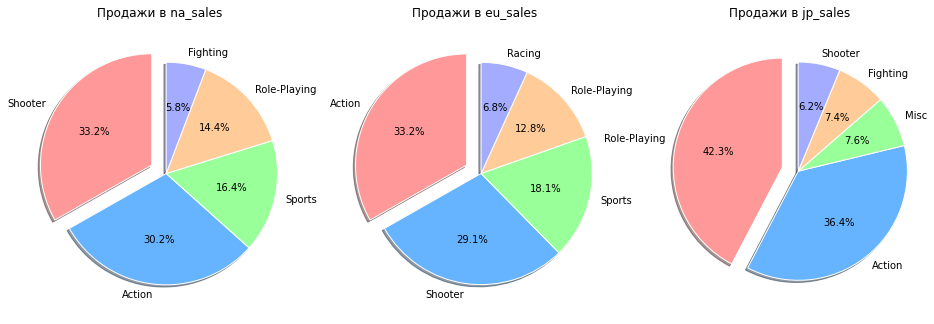

In [63]:
# наиболее популярные жанры (топ-5)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

# задаём переменные 
i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

# задаём набор цветов
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#a3acff']

# цикл для вывода диаграмм распределения жанров 
for i in [0,1,2]:
    labels = top5genre_dict[region[i]].index
    sizes = top5genre_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors) 
    ax.axis('equal')  

plt.show()

Топ5 жанров в США и Европе словпадает 1 мето (32-34% всех продаж) и 2 место (26-27% всех продаж) у жанров Action и Shooter соответственно. Role-Playing и Sports с примерно равным соотношением долей продаж (14-17%), в зависимости от региона жанры занимают 3 или 4 место. На 5 месте жанр Platform, около 10% от продаж.
Топ5 жанров в Японии заметно отличается. Тут 1 место и 44% продаж принадлежат жанру Role-Playing. Жанр Action занимает 2 место и 30% продаж. Жанры Platform, Misc и Simulation по 8.7% от всех продаж. При выходе на Японский рынок стоит учитывать его особенности.

Изучим влияние рейтинга ESRB на продажи

In [64]:
df_rating = (df_actual_years
          .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],aggfunc='sum')
          )
df_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
RP,58.95,56.90,64.72
T,34.07,14.78,38.95


Расшифровка значений рейтинга ESRB по версии поисковой системы Google:

- AO (Adults only 18+) — только для взрослых
- E - everyone - для всех
- M (Mature 17+) — от 17 лет
- T (Teen) — для подростков 13-19 лет
- K-A (Kids to Adults)— для детей и взрослых
- E10+ (Everyone 10+) — для всех старше 10 лет
- EC (Early Childhood) — для детей младшего возраста
- RP (Rating pending) — рейтинг ожидается

In [65]:
for column, label in columns_and_labels.items():
    current_table = df_actual_years.groupby(['rating']).agg({column:'sum'}).reset_index().sort_values(by=column, ascending=False).head(5)
    print()
    print('-- Топ-5 рейтинга ESRB ' + label)
    display(current_table)
    print()


-- Топ-5 рейтинга ESRB Северной Америки --


,rating,na_sales
2,M,96.42
3,RP,64.72
0,E,50.74
4,T,38.95
1,E10+,33.23




-- Топ-5 рейтинга ESRB Японии --


,rating,jp_sales
3,RP,56.90
4,T,14.78
0,E,8.94
2,M,8.01
1,E10+,4.46




-- Топ-5 рейтинга ESRB Европы --


,rating,eu_sales
2,M,93.44
3,RP,58.95
0,E,58.06
4,T,34.07
1,E10+,26.16


Можно сказать, что чем шире возрастные рамки, тем больше продаж. В США и Европе больше покупок совершается в играх 17+, тогда как в Японии кроме общего "Для всех" лидирует более младшая группа 13-19 лет. Игры 10+ тоже довольно популярны, в США они даже на третьем месте.

В результате четвёртого щага нашего исследования мы можем сделать следующие выводы:

- В Северной Америке и Европе очень схожий портрет пользователя:
- Топ- 5 платформы PS4, XOne, 3DS, WiiU и PSV с небольшой разницей в распределении продаж.
- Самые популярные жанры - Action, Shooter, Sports, Role-Playing и Platform
- Большая доля продаж приходится на рейтинг M (Mature 17+) — от 17 лет, далее по популярности рейтинг E - everyone - для всех. Затем идут в примерно равных долях E10+ (Everyone 10+) — для всех старше 10 лет и T (Teen) — для подростков 13-19 лет
- Портрет пользователя в Японии заметно отличается:

- Лидирует местная платформа: 66,3% продаж принадлежит платформе 3DS. Платформы PSV, PS4 и WiiU составляют 14.4%, 10.5% и 8.6% соответственно.
- 1 место и 44% продаж принадлежат жанру Role-Playing. Жанр Action занимает 2 место и 30% продаж. Жанры Platform, Misc и Simulation по 8.7% от всех продаж.
- Примерно одинаково популярны рейтинги E - everyone - для всех и T (Teen) — для подростков 13-19 лет. На 3 месте M (Mature 17+) — от 17 лет. При выходе на Японский рынок стоит учитывать его особенности.

# Шаг 5. Проверим гипотезы

# Гипотеза «Средние пользовательские рейтинги платформ Xbox One и PC одинаковые».

In [66]:
# Сформируем данные для проверки гипотезы
xone = df_actual_years.query(' platform == "XOne" ')['user_score'].dropna().to_list()
pc = df_actual_years.query(' platform == "PC" ')['user_score'].dropna().to_list()

# Рассчитаем средние значения
xone_mean = df_actual_years.query(' platform == "XOne" ')['user_score'].mean()
pc_mean = df_actual_years.query(' platform == "PC" ')['user_score'].mean()

print('Средний пользовательский рейтинг Xbox One: {:.3}\n'
     'Средний пользовательский рейтинг PC: {:.2}'.format(xone_mean, pc_mean))

Средний пользовательский рейтинг Xbox One: 6.59
Средний пользовательский рейтинг PC: 6.3


In [67]:
# Рассчитаем дисперсии
print('Дисперсия XOne =', np.var(xone))    
print('Дисперсия PC =',  np.var(pc))

Дисперсия XOne = 1.8795460055096425
Дисперсия PC = 2.8773743617307175


Сформулируем гипотезы:

- Нулевая гипотеза H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза H1: средние пользовательские рейтинги платформ Xbox One и PC различаются

Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются примерно на 27%. Критический уровень значимости 0.01. Пусть вероятность правильности вывода будет 99% и больше

In [68]:
alpha = .01

results = st.ttest_ind(
    xone, 
    pc,
    nan_policy='omit', 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Не удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов у платформ Xbox One и PC, а значит средние пользовательские рейтинги с большой вероятность равны.
Как мы выяснили ранее, средний пользовательский рейтинг для PC 6.5, а для Xbox One 6.52, что подтверждает нашу проверку.

# Гипотеза «Средние пользовательские рейтинги жанров Action и Sports разные»

In [69]:
# Сформируем данные для проверки гипотезы
action = df_actual_years.query('genre == "Action"')['user_score'].dropna().to_list()
sports = df_actual_years.query('genre == "Sports"')['user_score'].dropna().to_list()

# Рассчитаем средние значения
action_mean = df_actual_years.query('genre == "Action"')['user_score'].mean()
sports_mean = df_actual_years.query('genre == "Sports"')['user_score'].mean()

print('Средний пользовательский рейтинг Action: {:.3}\n'
     'Средний пользовательский рейтинг Sports: {:.2}'.format(action_mean, sports_mean))

Средний пользовательский рейтинг Action: 6.76
Средний пользовательский рейтинг Sports: 5.2


In [70]:
# Рассчитаем дисперсии
print('Дисперсия XOne =', np.var(action))    
print('Дисперсия PC =',  np.var(sports))

Дисперсия XOne = 1.89208448117539
Дисперсия PC = 3.4198375596751185


Сформулируем гипотезы:

- Нулевая гипотеза H0: cредние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H1: средние пользовательские рейтинги жанров Action и Sports разные

Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются примерно на 34%. Критический уровень значимости 0.01. Пусть вероятность правильности вывода будет 99% и больше

In [71]:
alpha = .01

results = st.ttest_ind(
    action, 
    sports, 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Отвергаем гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports — средние пользовательские рейтинги с большой вероятность отличаются.
Так как гипотеза двухсторонняя, то сама проверка не даёт нам понять в какую именно сторону оно отличается.
Но как мы уже выяснили ранее: средний пользовательский рейтинг жанра Action 6.78, а для Sports 5.7.

# Шаг 6. Общий вывод

В ходе исследования рынка компьютерных игр мы обработали массивов данных:

- заменили названия столбцов
- преобразовали типы данных в нужные
- обработали пропуски
- посчитали суммарные продажи во всех регионах в новый столбец


На этапе исследования данных нам удалось выяснить, что:

- актуальный период, данные которого помогут построить прогноз на 2017 - это 2014 - 2016 годы
- самые перспективные платформы: PS4, XOne и WiiU
- оценки критиков и пользователей не имеют выраженного влияния на объемы продаж, но оценки влияют друг на друга
- самые продаваемые жанры: Shooter, Sports и Fighting именно в этих жанрах совершены много миллионные продажи.


Портрет пользователей в Америке и Европе схож, но заметно отличается от Японии:

- В Америке и Европе самые популярные платформы - PS4, XOne, 3DS. И игры с жанрами - Action, Shooter.
- Большая доля продаж приходится на рейтинг M (Mature 17+) — от 17 лет, далее по популярности рейтинг E - everyone - для всех.
- В Японии свои особые предпочтения в плане видеоигр, максимально популярны ролевые видеоигры, а платформа - 3DS.


В результате проверок гипотез, мы выяснили, ччто:

- Cредние пользовательские рейтинги платформ Xbox One и PC не различаются
- Cредние пользовательские рейтинги жанров Action и Sports различаются

Можно дать следующие рекомендации для планирования рекламных кампаний:

- ставку лучше делать на игры для приставок/консолей.
- важно учитывать региональные предпочтения к платформам и жанрам, при выходе на новый рынок.
- следует помнить, что чем шире возрастной рейтинг, тем больше продаж.